# _Unsupervised Learning:   Hierarchical Clustering and K-Means_


## Agglomerative Hierarchical Clustering

Useful readings can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) and [here](https://en.wikipedia.org/wiki/Hierarchical_clustering).


### Short Demo

In [444]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [445]:
# Values extracted from the official scikit-learn documentation (check the first link).
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

In [446]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

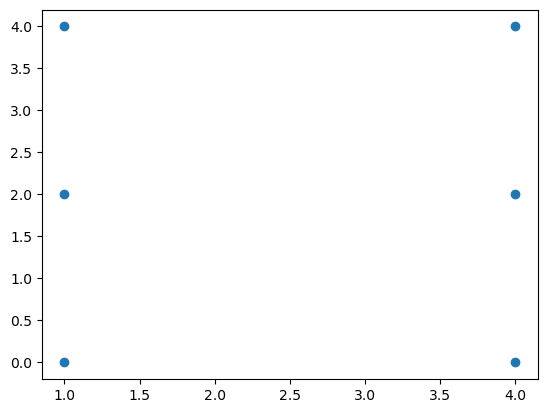

In [447]:
# Visualise data
plt.scatter(X[:,0], X[:,1])

In [448]:
# Agglomerative Hierarchical Clustering model with no parameters
aggl_model_demo = AgglomerativeClustering().fit(X)

In [449]:
aggl_model_demo

AgglomerativeClustering()

In [450]:
# Cluster labels for each point
aggl_model_demo.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

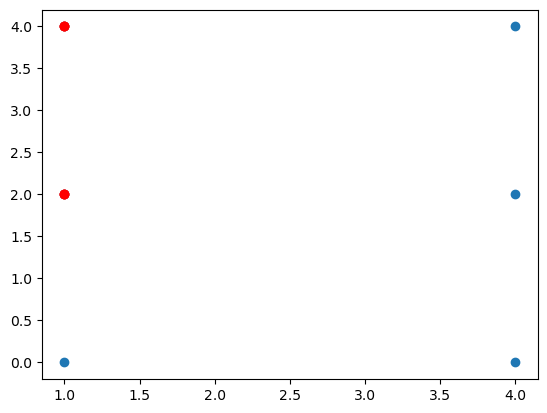

In [451]:
# Visualise data

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[aggl_model_demo.labels_,0], X[aggl_model_demo.labels_,1], c='r')

### Task 0

Play around with `data.txt` and:
* Plot data before applying the _Agglomerative Hierarchical Clustering_ algorithm (**TO DO1**);
* **TO DO2**:
    - Define a new variable _X_ to store `data_txt`,
    - Apply the _Agglomerative Hierarchical Clustering_ algorithm and modify its parameters for 15 clusters;
    - Write down your observations for different values of `affinity` (_"euclidean"_ or _"manhattan"_) and `linkage` (_"ward"_ or _"complete"_);
* Visualise the obtained clusters.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

In [452]:
# Load data for this exercise
data_txt = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

In [453]:
data_txt

array([[665845., 557965.],
       [597173., 575538.],
       [618600., 551446.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]])

Text(0.5, 1.0, 'data.txt before clustering')

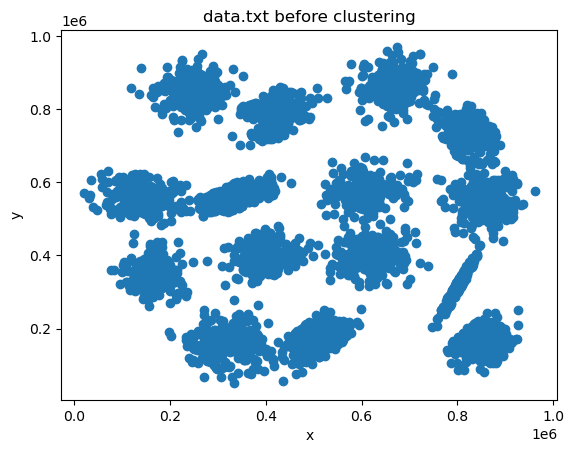

In [454]:
plt.scatter(data_txt[:, 0], data_txt[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("data.txt before clustering")


Text(0.5, 1.0, 'Agglomerative clustering, 15 clusters')

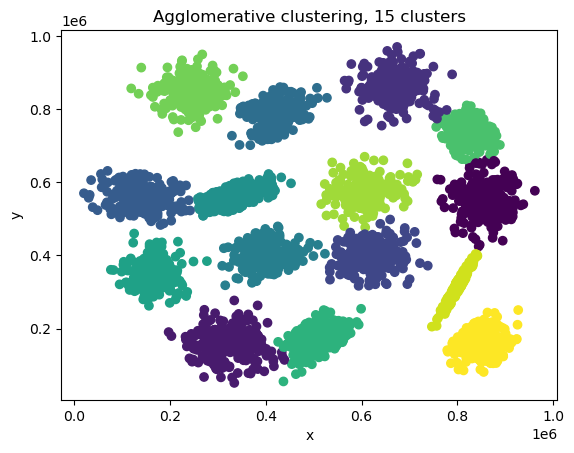

In [455]:
X = data_txt

aggl_model = AgglomerativeClustering(
    n_clusters=15,
    metric="euclidean",
    linkage="ward"
)

y_predict = aggl_model.fit_predict(X)
labels = y_predict

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Agglomerative clustering, 15 clusters")


The first scatter plot shows many tight clouds of points with gaps between them.
This suggests that the data naturally forms groups and that clustering should work well.

With Agglomerative Clustering using affinity="euclidean" and linkage="ward", the algorithm finds compact, rounded clusters.
The different clouds are separated cleanly and most clusters have a similar size.

With affinity="euclidean" and linkage="complete", the clusters are still reasonable but are more sensitive to distant points, because complete linkage uses the farthest distance between clusters.
Some clusters become slightly larger or more stretched.

With affinity="manhattan" and linkage="complete", the distance is measured along the axes.
The overall grouping is similar, but some clusters change shape and size a bit.

Ward linkage only supports Euclidean distance, so the combination linkage="ward" with affinity="manhattan" is not valid and raises an error.

**TO DO3**: Use the _Nearest Centroid_ [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html) to compute the centroids of each cluster.

In [457]:
from sklearn.neighbors import NearestCentroid

centroid_model = NearestCentroid()
centroid_model.fit(X, labels)
centroids = centroid_model.centroids_

print("Centroids:")
print(centroids)


Centroids:
[[858523.47107438 549109.0137741 ]
 [321607.60349854 161194.23323615]
 [672400.67597765 861555.2849162 ]
 [619663.6884273  398658.75074184]
 [140019.83526012 558305.60115607]
 [417799.69426752 787001.99363057]
 [399223.625      404923.23579545]
 [337858.94189602 562276.80428135]
 [167727.3880597  348147.6       ]
 [508441.62931034 176054.77873563]
 [823717.6744186  733102.37209302]
 [244654.8856305  847642.04105572]
 [606060.5959596  574146.15824916]
 [802138.44551282 319314.90384615]
 [852675.82769231 157386.94461538]]


**TO DO4:** Iterate through the obtained labels and visualise each cluster with its corresponding centroid.

Text(0.5, 1.0, 'Agglomerative clustering with centroids')

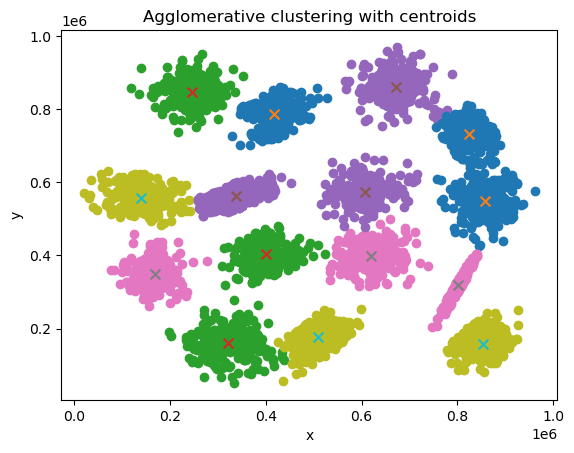

In [458]:
unique_labels = np.unique(labels)

# TO DO4
for cluster in unique_labels:
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
    plt.scatter(
        centroids[cluster, 0],
        centroids[cluster, 1],
        marker="x",
        s=50
    )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Agglomerative clustering with centroids")


The Nearest Centroid model gives one center point for each cluster.
Each centroid is the average position of all points in that cluster.

In the final plot, points in the same cluster share a color and each centroid is shown by a cross.
The centroids sit near the middle of the dense part of each cloud, which means the clusters and their centers match the structure of the data well.

## K-Means

Please refer to this [document](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for more information.

### Task 1

Play around with `data.txt` and:
* **TO DO1**: Apply the _K-Means Clustering_ algorithm and generate 15 clusters;
* **TO DO2**: Write down your observations for the `algorithm` parameter (_"lloyd"_ or _"elkan"_);
* **TO DO3**: Compute the centroids for each cluster;
* **TO DO4**: Visualise the obtained clusters with their corresponding centroids.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

In [460]:
from sklearn.cluster import KMeans

X = data_txt

kmeans = KMeans(
    n_clusters=15,
    algorithm="lloyd",
    random_state=42,
    
)

labels = kmeans.fit_predict(X)


In [461]:
kmeans_elkan = KMeans(
    n_clusters=15,
    algorithm="elkan",
    random_state=42,
    
)

labels_elkan = kmeans_elkan.fit_predict(X)

print("Inertia (lloyd):", kmeans.inertia_)
print("Inertia (elkan):", kmeans_elkan.inertia_)


Inertia (lloyd): 8913812296978.85
Inertia (elkan): 8913812296978.85


I ran *K-Means* with `algorithm="lloyd"` and with `algorithm="elkan"`, both with 15 clusters. For data.txt the final clusters are the same and the inertia values are equal for the same random state. This means both algorithms converge to the same solution. The main difference is that Elkan is designed to be faster by avoiding some distance calculations, especially for larger datasets, while Lloyd is the basic, more direct version of K-means.

In [462]:
centroids = kmeans.cluster_centers_
print("Centroids:")


Centroids:


In [463]:
# Expected Output:
centroids

array([[337565.11890244, 562157.17682927],
       [507818.31339031, 175610.41595441],
       [670929.06818182, 862765.73295454],
       [858947.97134671, 546259.65902579],
       [852058.45259939, 157685.52293578],
       [244654.8856305 , 847642.04105572],
       [167856.14071856, 347812.71556886],
       [617601.91071429, 399504.21428572],
       [320602.55      , 161521.85      ],
       [139682.37572254, 558123.40462428],
       [417799.69426752, 787001.99363057],
       [823421.2507837 , 731145.27272727],
       [801616.78164557, 321123.34177215],
       [398555.94857143, 404855.06857143],
       [606380.41554054, 574534.59121622]])

Text(0.5, 1.0, 'K-Means clustering with centroids')

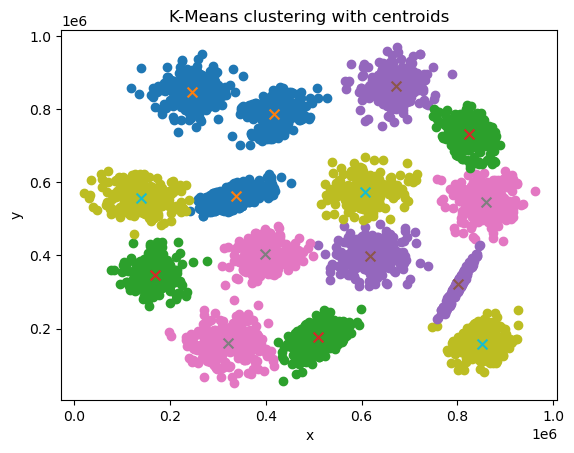

In [464]:
unique_labels = np.unique(labels)

# TO DO4
for cluster in unique_labels:
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
    plt.scatter(
        centroids[cluster, 0],
        centroids[cluster, 1],
        marker="x",
        s=50
    )

plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Means clustering with centroids")


The *K-Means* centroids are the mean of the points in each cluster, just like in the previous task.
In the plot, each cluster has its own color and its centroid is marked with a cross.
The centroids are near the middle of each cloud of points, and the groups match the structure we saw in the original data.
This shows that *K-Means* with 15 clusters captures the main groups in the dataset well.

### Task 2

Try to modify the number of clusters for `data2.txt` and write down your observations for the _Agglomerative Hierarchical Clustering_ model.

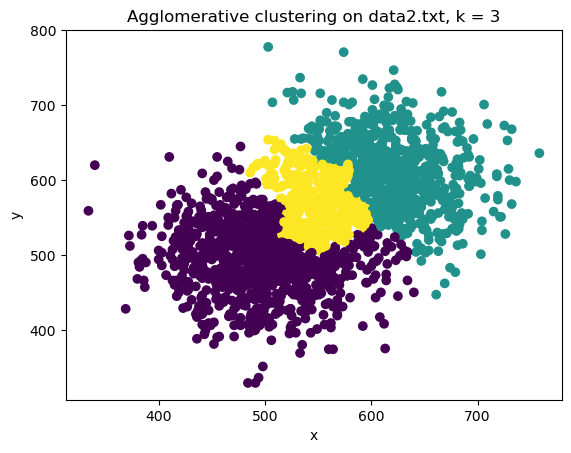

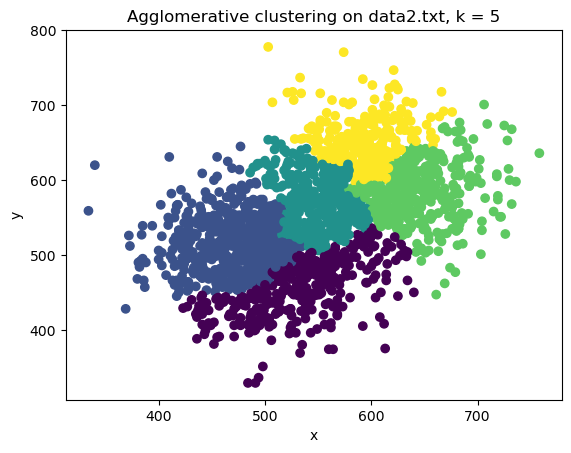

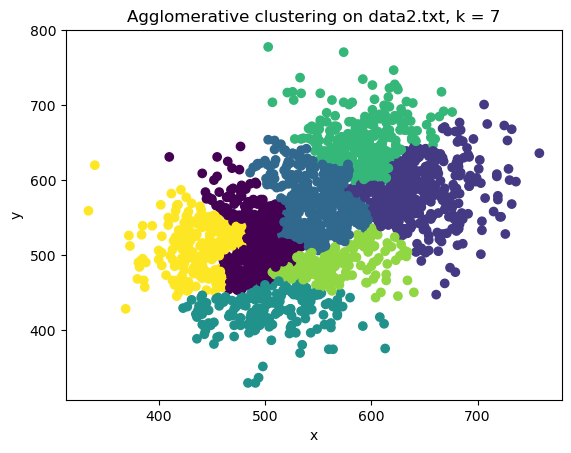

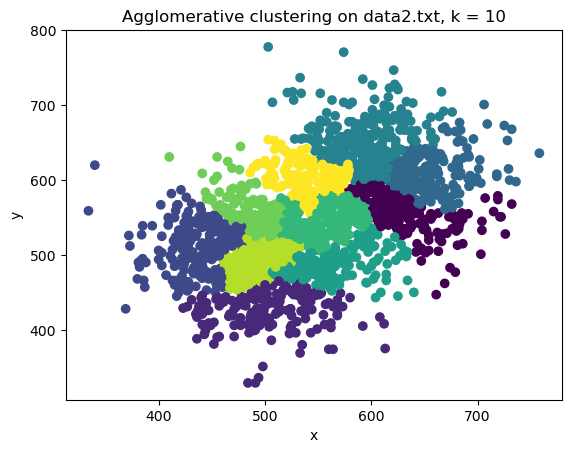

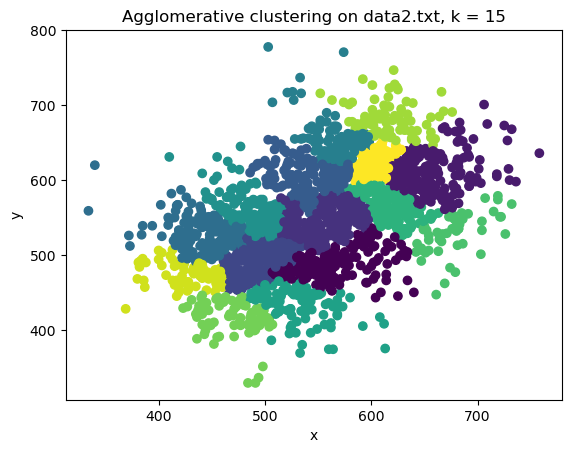

In [465]:
data2_txt = np.loadtxt("data2.txt", usecols=(0, 1), skiprows=1)

X2 = data2_txt

for k in [3, 5, 7, 10, 15]:
    model2 = AgglomerativeClustering(
        n_clusters=k,
        metric="euclidean",
        linkage="ward"
    )
    labels2 = model2.fit_predict(X2)

    plt.figure()
    plt.scatter(X2[:, 0], X2[:, 1], c=labels2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Agglomerative clustering on data2.txt, k = {k}")


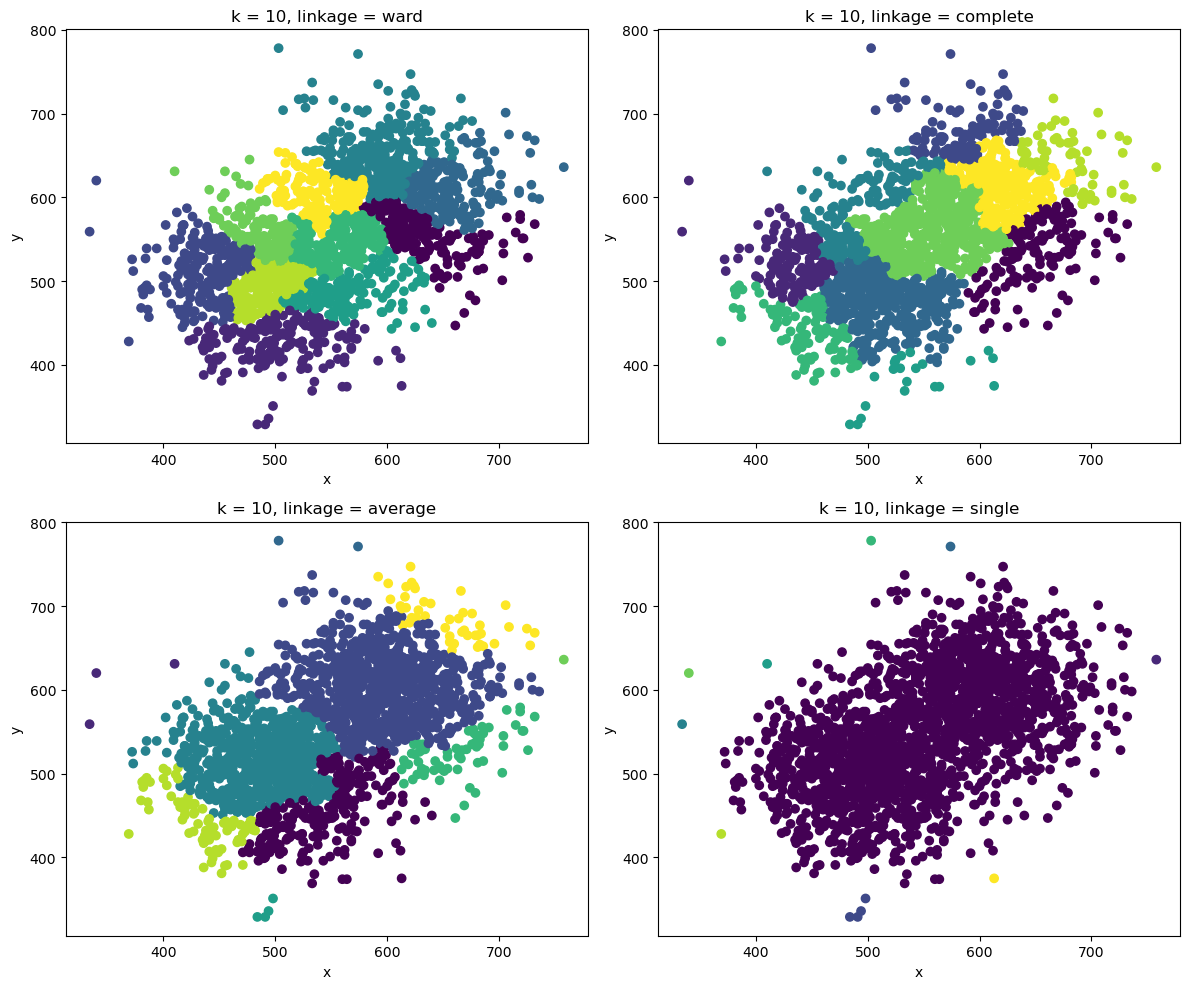

In [466]:
data2_txt = np.loadtxt("data2.txt", usecols=(0, 1), skiprows=1)

X2 = data2_txt
k = 10
linkages = ["ward", "complete", "average", "single"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, link in enumerate(linkages):
    if link == "ward":
        model2 = AgglomerativeClustering(
            n_clusters=k,
            linkage="ward",
            metric="euclidean"
        )
    else:
        model2 = AgglomerativeClustering(
            n_clusters=k,
            linkage=link,
            metric="euclidean"
        )
    labels2 = model2.fit_predict(X2)
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X2[:, 0], X2[:, 1], c=labels2)
    ax.set_title(f"k = {k}, linkage = {link}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()


### Ward
The clusters are compact and roughly round.
The points are split into several small, dense groups with clear borders.
This is because Ward tries to minimise the variance inside each cluster.

### Complete
The clusters are still separated, but some of them are more stretched along the main diagonal of the data.
Complete linkage uses the farthest distance between two clusters, so it avoids merging groups that have distant points, which can create elongated clusters.

### Average
The clusters are less compact than with Ward.
Some clusters are larger and cut across the cloud of points.
Average linkage uses the mean distance between all pairs of points in two clusters, so the merges are a compromise between Ward and complete, but on this dataset it does not highlight very tight groups.

### Single
Almost all points fall into one large cluster, with a few tiny clusters at the edges.
This is the classic “chaining” effect of single linkage: points are linked step by step through nearest neighbours, so one big chain spans the data, and only a few points are split off as separate clusters.

Overall, with the same number of clusters, Ward gives the most compact and balanced groups, complete and average are in between, and single mostly fails to separate the data into meaningful clusters, producing one dominant cluster instead.